## Importing Libraries

In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, PowerTransformer, MinMaxScaler
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, mean_squared_error, mean_absolute_error, r2_score
from lazypredict.Supervised import LazyClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras_tuner import RandomSearch
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## Importing Data

In [3]:
# Load the dataset
url = 'Loan.csv'  # Replace with the actual URL or file path
data = pd.read_csv(url)
data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.00,0.72,11,126928,0.20,0.23,419.81,0.18,0,49.00
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.08,0.94,3,43609,0.21,0.20,794.05,0.39,0,52.00
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.67,0.87,6,5205,0.22,0.21,666.41,0.46,0,52.00
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.00,0.90,5,99452,0.30,0.30,1047.51,0.31,0,54.00
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.33,0.94,5,227019,0.20,0.18,330.18,0.07,1,36.00


In [4]:
data.shape

(20000, 36)

In [5]:
data.describe() # Statistical Summary of Numerical Values

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,...,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,39.75,59161.47,571.61,17.52,24882.87,54.06,1.52,454.29,0.29,3.02,...,4891.72,0.80,5.00,72294.32,0.24,0.24,911.61,0.40,0.24,50.77
std,11.62,40350.85,51.00,11.32,13427.42,24.66,1.39,240.51,0.16,1.74,...,3296.77,0.12,2.24,117920.02,0.04,0.04,674.58,0.34,0.43,7.78
min,18.00,15000.00,343.00,0.00,3674.00,12.00,0.00,50.00,0.00,0.00,...,1250.00,0.26,0.00,1000.00,0.13,0.11,97.03,0.02,0.00,28.80
25%,32.00,31679.00,540.00,9.00,15575.00,36.00,0.00,286.00,0.16,2.00,...,2629.58,0.73,3.00,8734.75,0.21,0.21,493.76,0.18,0.00,46.00
50%,40.00,48566.00,578.00,17.00,21914.50,48.00,1.00,402.00,0.27,3.00,...,4034.75,0.82,5.00,32855.50,0.24,0.24,728.51,0.30,0.00,52.00
75%,48.00,74391.00,609.00,25.00,30835.00,72.00,2.00,564.00,0.39,4.00,...,6163.00,0.89,6.00,88825.50,0.26,0.27,1112.77,0.51,0.00,56.00
max,80.00,485341.00,712.00,61.00,184732.00,120.00,5.00,2919.00,0.92,13.00,...,25000.00,1.00,16.00,2603208.00,0.41,0.45,10892.63,4.65,1.00,84.00


## Data Cleaning & Pre-Processing

In [6]:
#Remove Application date, TotalDebtToIncomeRatio from the data
data = data.drop(['ApplicationDate', 'TotalDebtToIncomeRatio'], axis=1)

In [7]:
data.isna().sum() #Checking for Null Values

Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
InterestRate                  0
MonthlyL

### Transforming the skewed numerical data

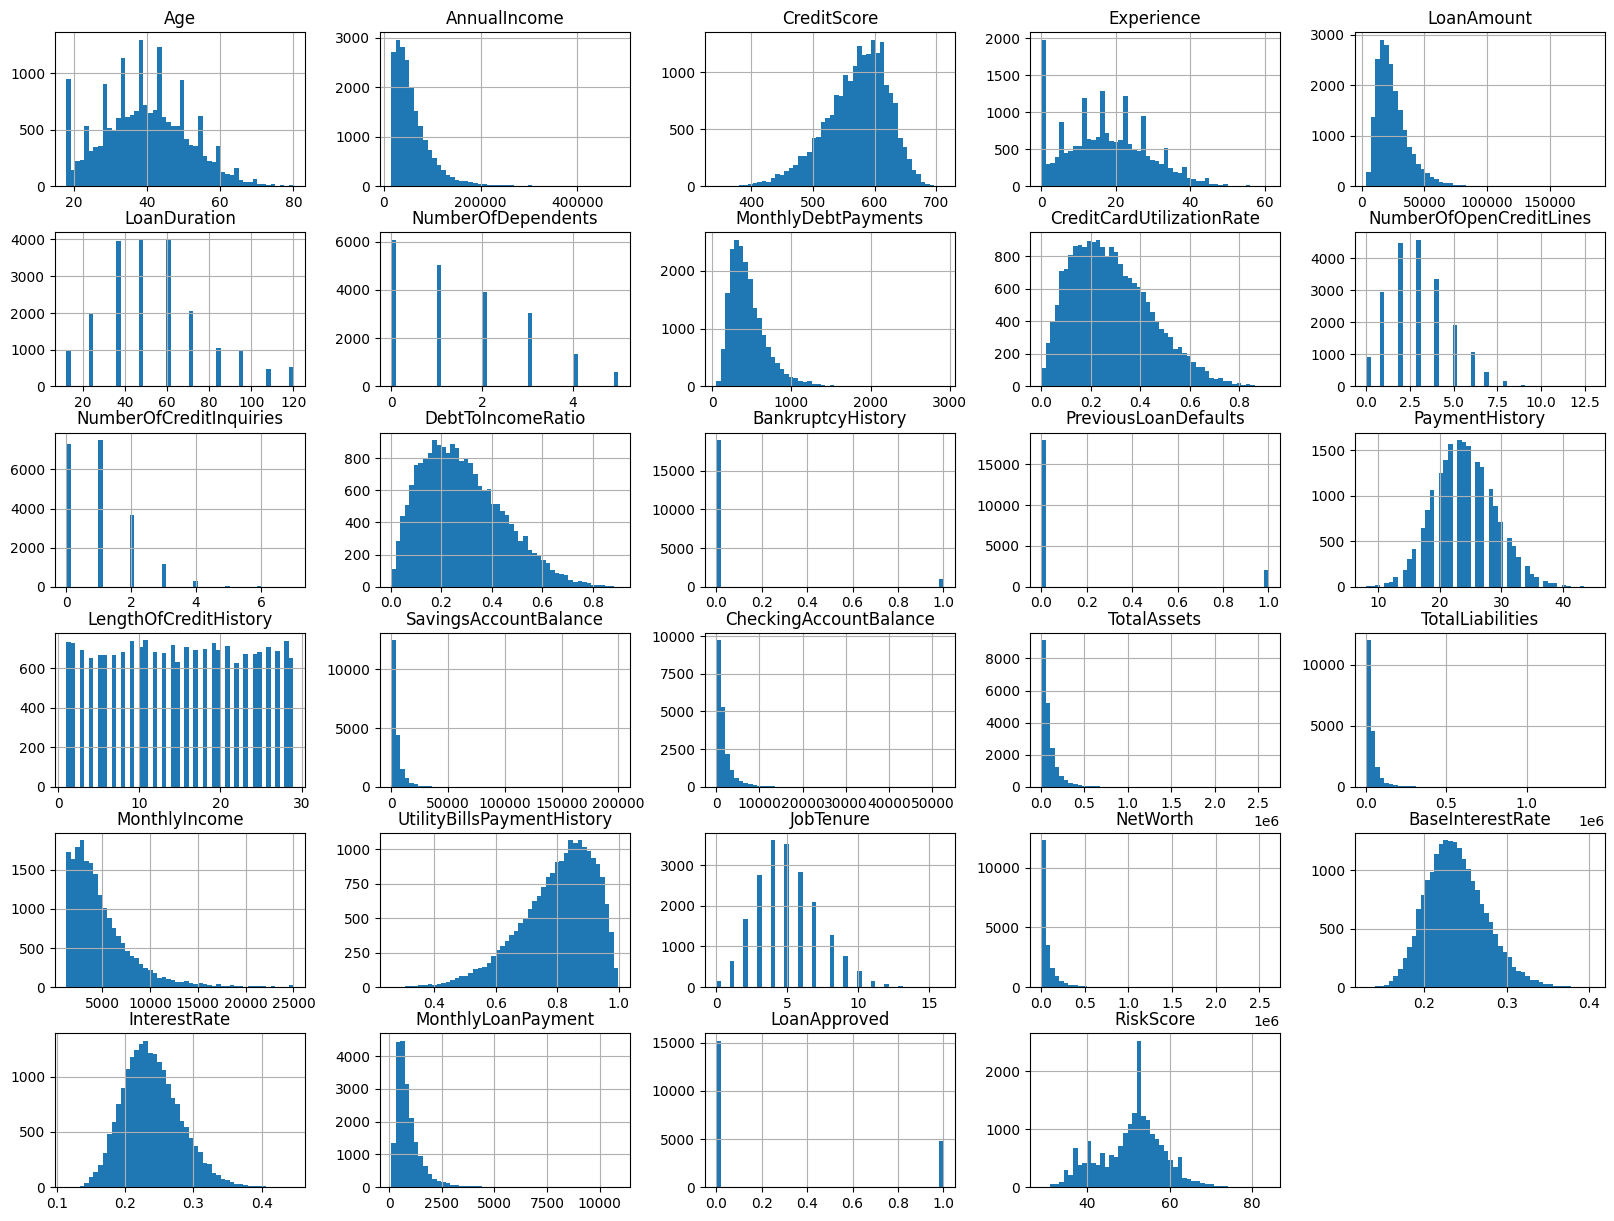

In [8]:
# Plots to show distribution of numerical values
data.hist(bins=50, figsize=(20,15))
plt.show()

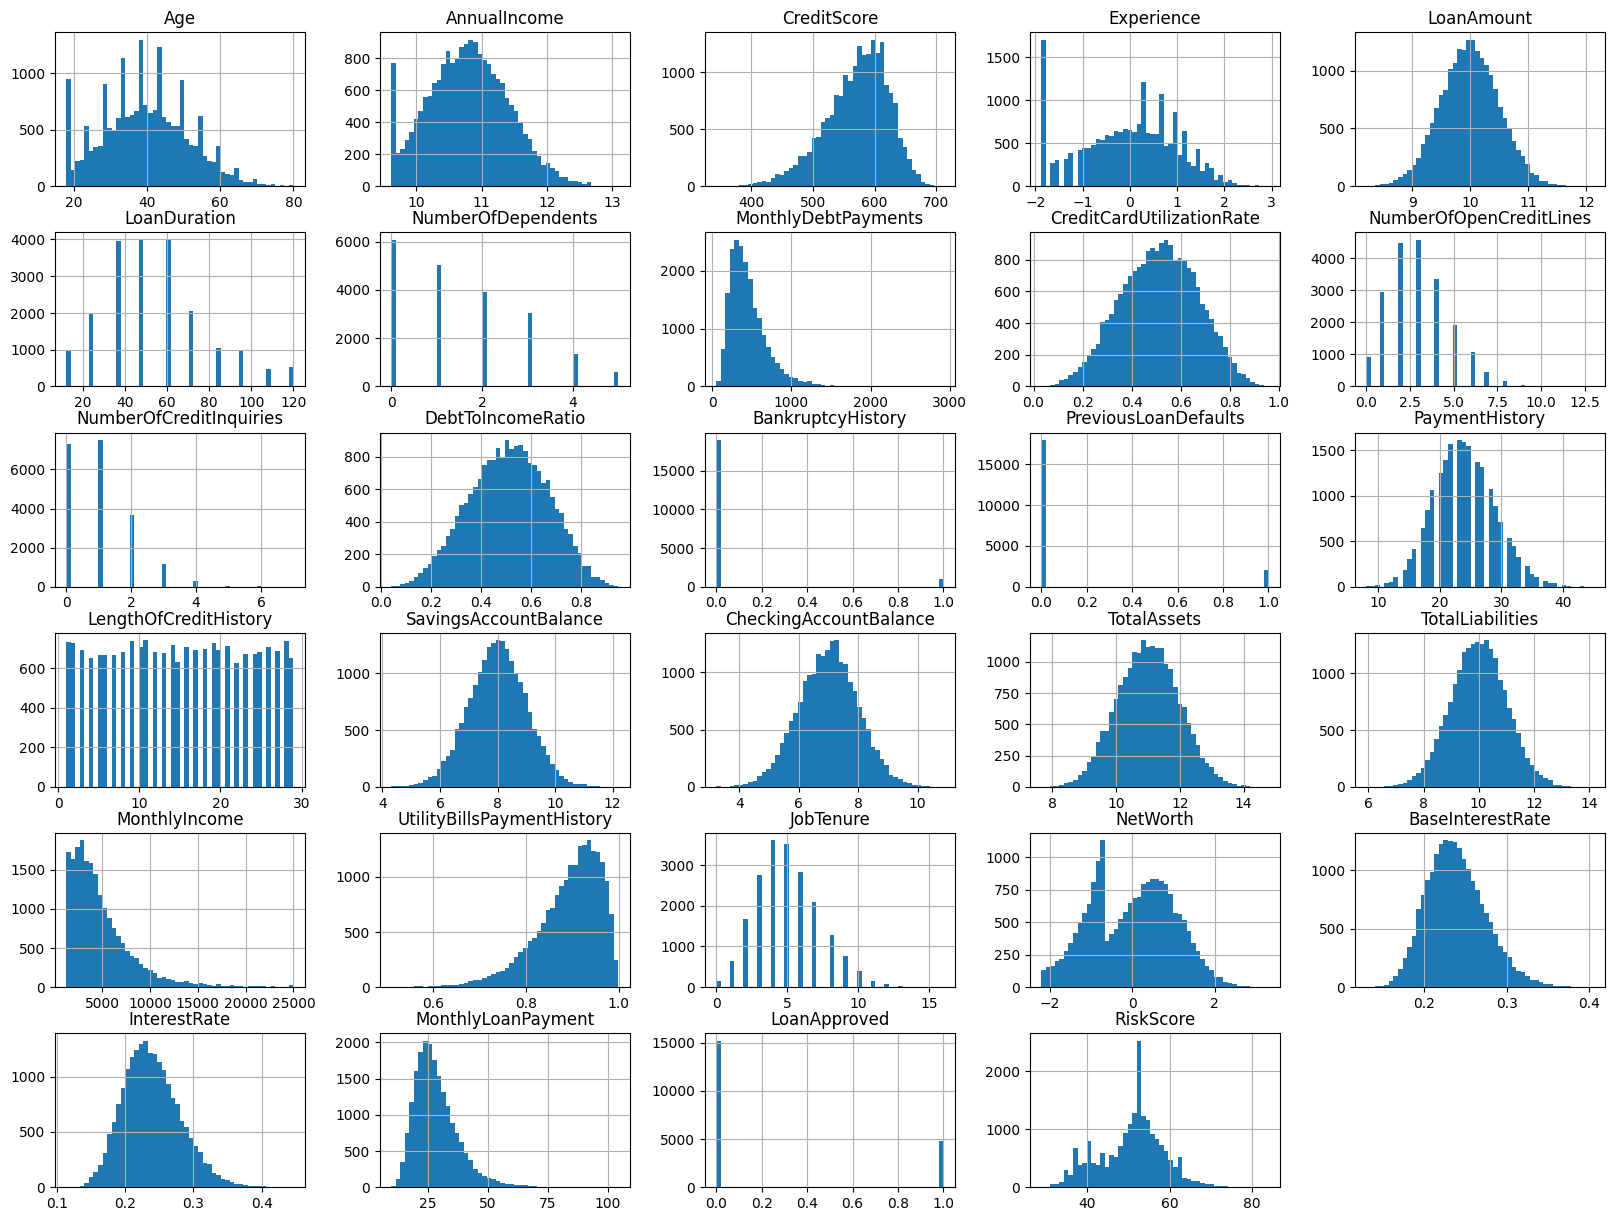

In [9]:
# Applying Various Transformations to remove skewness in data

#Log Transformation
log_columns = ['AnnualIncome', 'LoanAmount', 'TotalAssets', 'TotalLiabilities', 'CheckingAccountBalance', 'SavingsAccountBalance']
data[log_columns] = data[log_columns].apply(np.log1p)

#Sqrt Transformation
sqrt_columns = ['DebtToIncomeRatio', 'CreditCardUtilizationRate', 'MonthlyLoanPayment','UtilityBillsPaymentHistory']
data[sqrt_columns] = data[sqrt_columns].apply(np.sqrt)

#Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
data[['NetWorth']] = pt.fit_transform(data[['NetWorth']])
data[['Experience']] = pt.fit_transform(data[['Experience']])

data.hist(bins=50, figsize=(20,15))
plt.show()

### Encoding the categorical features

In [10]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols

Index(['EmploymentStatus', 'EducationLevel', 'MaritalStatus',
       'HomeOwnershipStatus', 'LoanPurpose'],
      dtype='object')

In [11]:
# Display unique classes for each categorical column
for col in categorical_cols:
    unique_classes = data[col].unique()
    print(f"Column '{col}' has the following classes: {unique_classes}")

Column 'EmploymentStatus' has the following classes: ['Employed' 'Self-Employed' 'Unemployed']
Column 'EducationLevel' has the following classes: ['Master' 'Associate' 'Bachelor' 'High School' 'Doctorate']
Column 'MaritalStatus' has the following classes: ['Married' 'Single' 'Divorced' 'Widowed']
Column 'HomeOwnershipStatus' has the following classes: ['Own' 'Mortgage' 'Rent' 'Other']
Column 'LoanPurpose' has the following classes: ['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']


In [12]:
# Encoding the categorical columns
categorical_columns = ['EmploymentStatus', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']

# Initialize BinaryEncoder
binary_encoder = BinaryEncoder(cols=categorical_columns)

# Apply Binary Encoding
data_encoded = binary_encoder.fit_transform(data)

# Manual Mapping for EducationLevel Column to maintain the ordinal relationship
education_mapping = {
    'High School': 1,
    'Associate': 2,
    'Bachelor': 3,
    'Master': 4,
    'Doctorate': 5
}
data_encoded['EducationLevel'] = data_encoded['EducationLevel'].map(education_mapping)

In [13]:
data_encoded

,Age,AnnualIncome,CreditScore,EmploymentStatus_0,EmploymentStatus_1,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus_0,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,LoanApproved,RiskScore
0,45,10.60,617,0,1,4,0.48,9.48,48,0,...,9.86,3329.00,0.85,11,1.02,0.20,0.23,20.49,0,49.00
1,38,10.59,628,0,1,2,-0.09,10.17,48,0,...,9.17,3309.08,0.97,3,0.27,0.21,0.20,28.18,0,52.00
2,47,10.61,570,0,1,3,0.78,9.78,36,0,...,11.77,3393.67,0.93,6,-1.17,0.22,0.21,25.81,0,52.00
3,58,11.14,545,0,1,1,1.33,10.54,96,0,...,8.59,5757.00,0.95,5,0.85,0.30,0.30,32.37,0,54.00
4,37,11.55,594,0,1,2,0.08,9.13,36,0,...,9.76,8605.33,0.97,5,1.45,0.20,0.18,18.17,1,36.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,10.31,587,0,1,1,0.25,10.11,36,0,...,10.15,2515.00,0.91,1,0.43,0.22,0.20,30.10,0,55.00
19996,56,10.80,567,0,1,2,1.26,10.16,36,0,...,8.63,4103.83,0.90,3,0.54,0.23,0.20,30.96,0,54.00
19997,44,10.80,645,0,1,3,0.33,10.52,72,0,...,8.45,4079.83,0.94,3,0.88,0.23,0.23,30.75,0,45.00
19998,60,10.62,560,0,1,1,1.46,9.60,72,0,...,9.35,3418.75,0.92,5,-0.70,0.25,0.26,20.28,0,59.00


### Final clean data

In [14]:
data_encoded.to_csv('encoded_data.csv', index=False)

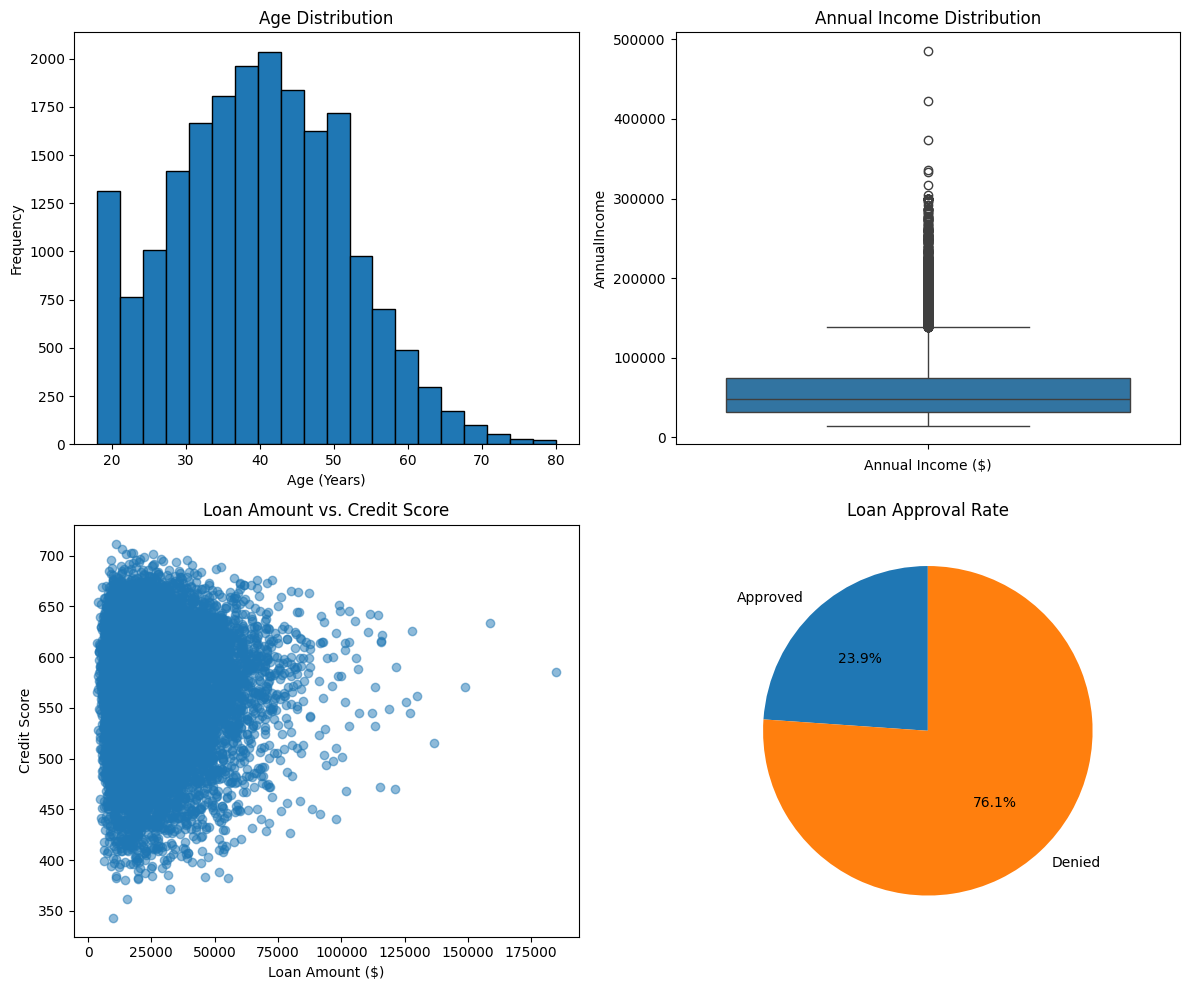

In [64]:
# Subplot configuration
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age Distribution
axes[0, 0].hist(data_encoded['Age'], bins=20, edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age (Years)')
axes[0, 0].set_ylabel('Frequency')

# Annual Income Box Plot
if data_encoded['AnnualIncome'].max() < 20:  # Check if log-transformed
    data_encoded['AnnualIncome'] = np.exp(data_encoded['AnnualIncome'])  # Revert log transformation
sns.boxplot(data_encoded['AnnualIncome'], ax=axes[0, 1])
axes[0, 1].set_title('Annual Income Distribution')
axes[0, 1].set_xlabel('Annual Income ($)')

# Loan Amount vs. Credit Score Scatter Plot
if data_encoded['LoanAmount'].max() < 20:  # Check if log-transformed
    data_encoded['LoanAmount'] = np.exp(data_encoded['LoanAmount'])  # Revert log transformation
axes[1, 0].scatter(data_encoded['LoanAmount'], data_encoded['CreditScore'], alpha=0.5)
axes[1, 0].set_title('Loan Amount vs. Credit Score')
axes[1, 0].set_xlabel('Loan Amount ($)')
axes[1, 0].set_ylabel('Credit Score')

# Loan Approval Rate Pie Chart
labels = ['Approved', 'Denied']
sizes = [data_encoded['LoanApproved'].mean(), 1 - data_encoded['LoanApproved'].mean()]
axes[1, 1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Loan Approval Rate')

# Adjust layout and display
plt.tight_layout()
plt.show()


In [15]:
#Dividing into X and Y
X = data_encoded.drop(['LoanApproved', 'RiskScore'], axis=1)
y = data_encoded['LoanApproved']

In [16]:
# Use Column Transformer to apply min max scaler on numnerical columns of X
'''numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
Scaler  = MinMaxScaler()
for col in numerical_cols:
  X[col] = Scaler.fit_transform(X[[col]])
'''

"numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns\nScaler  = MinMaxScaler()\nfor col in numerical_cols:\n  X[col] = Scaler.fit_transform(X[[col]])\n"

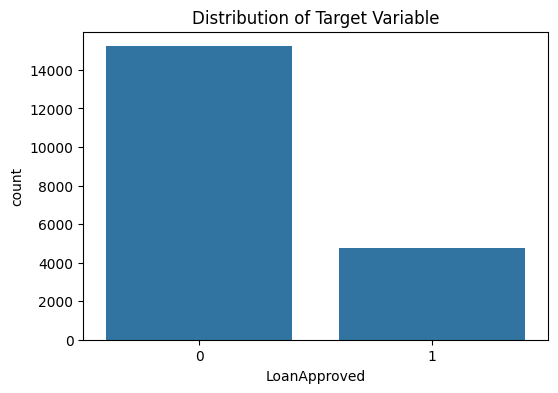

In [17]:
# Target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Target Variable')
plt.show()

### Correlation matrix

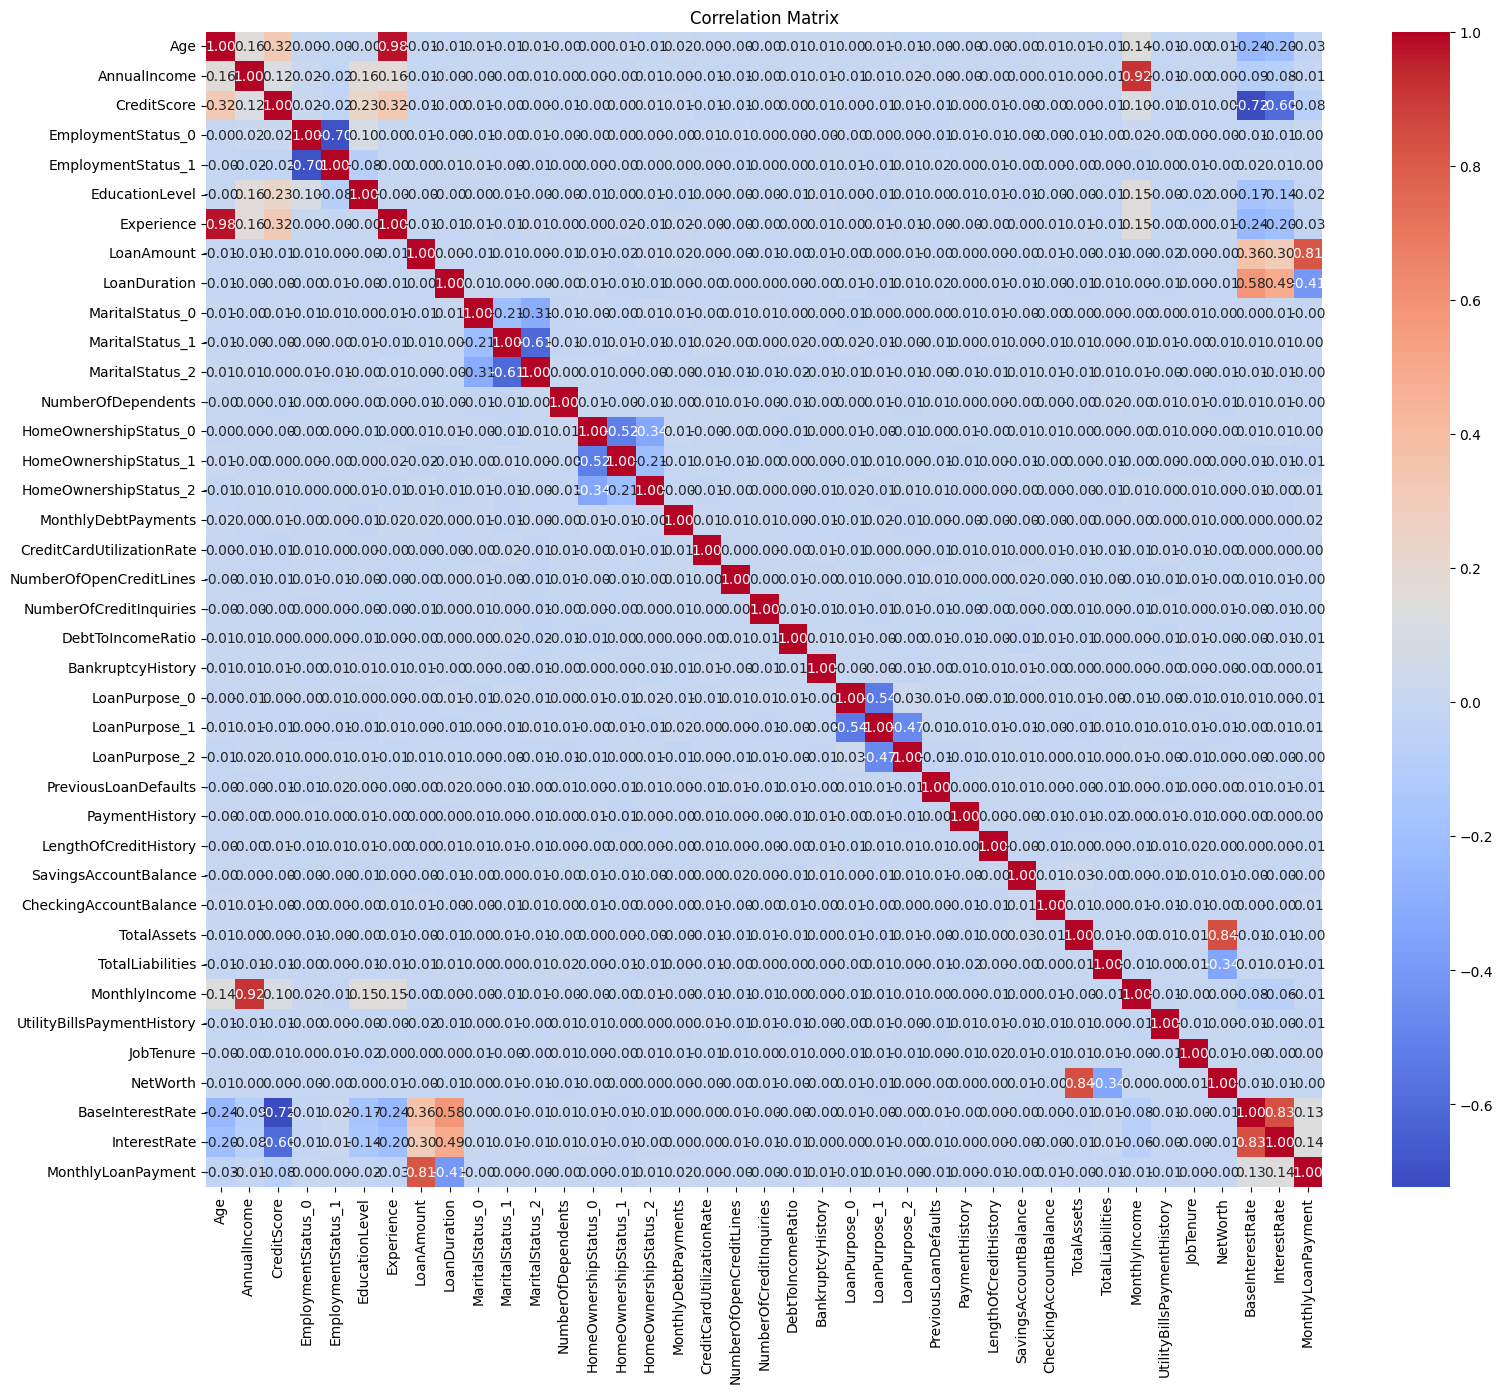

In [18]:
corr_matrix = X.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [19]:
## Removing Columns with High Correlation
# Find pairs of features with correlation > 0.8 (or < -0.8)
threshold = 0.8
high_corr_pairs = []

# Iterate through the correlation matrix and find highly correlated pairs
for i in range(corr_matrix.shape[0]):
    for j in range(i + 1, corr_matrix.shape[1]):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((corr_matrix.index[i], corr_matrix.columns[j]))

# Display highly correlated pairs
print("Highly Correlated Feature Pairs (|correlation| > 0.8):")
print(high_corr_pairs)

# Drop one feature from each highly correlated pair
features_to_drop = set(pair[1] for pair in high_corr_pairs) 
X_reduced = X.drop(columns=features_to_drop)

# Display the remaining features
print("\nRemaining Features After Dropping Highly Correlated Ones:")
print(X_reduced.columns)
X_reduced.shape

Highly Correlated Feature Pairs (|correlation| > 0.8):
[('Age', 'Experience'), ('AnnualIncome', 'MonthlyIncome'), ('LoanAmount', 'MonthlyLoanPayment'), ('TotalAssets', 'NetWorth'), ('BaseInterestRate', 'InterestRate')]

Remaining Features After Dropping Highly Correlated Ones:
Index(['Age', 'AnnualIncome', 'CreditScore', 'EmploymentStatus_0',
       'EmploymentStatus_1', 'EducationLevel', 'LoanAmount', 'LoanDuration',
       'MaritalStatus_0', 'MaritalStatus_1', 'MaritalStatus_2',
       'NumberOfDependents', 'HomeOwnershipStatus_0', 'HomeOwnershipStatus_1',
       'HomeOwnershipStatus_2', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'LoanPurpose_0', 'LoanPurpose_1', 'LoanPurpose_2',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'UtilityB

(20000, 34)

### Train test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
y_train.value_counts()

LoanApproved
0    12176
1     3824
Name: count, dtype: int64

In [22]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [23]:
y_train_resampled.value_counts()

LoanApproved
0    12176
1    12176
Name: count, dtype: int64

## Classification of Loan Approval

### Finding best model using Lazypredict

In [ ]:
clf = LazyClassifier(ignore_warnings=True, random_state=42, verbose=0)
models, predictions = clf.fit(X_train_resampled, X_test, y_train_resampled, y_test)

 97%|█████████▋| 30/31 [02:25<00:02,  2.66s/it]

[LightGBM] [Info] Number of positive: 12176, number of negative: 12176
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5681
[LightGBM] [Info] Number of data points in the train set: 24352, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 31/31 [02:26<00:00,  4.71s/it]


Model Performance:
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RidgeClassifier                    0.88               0.90     0.90      0.88   
RidgeClassifierCV                  0.88               0.90     0.90      0.88   
LinearDiscriminantAnalysis         0.88               0.90     0.90      0.88   
LogisticRegression                 0.90               0.90     0.90      0.91   
LinearSVC                          0.90               0.90     0.90      0.90   
CalibratedClassifierCV             0.90               0.90     0.90      0.91   
SVC                                0.91               0.89     0.89      0.91   
LGBMClassifier                     0.92               0.89     0.89      0.92   
AdaBoostClassifier                 0.91               0.89     0.89      0.91   
SGDClassifier                      0.90               0.89     0.89      0.90   
XGBClassi

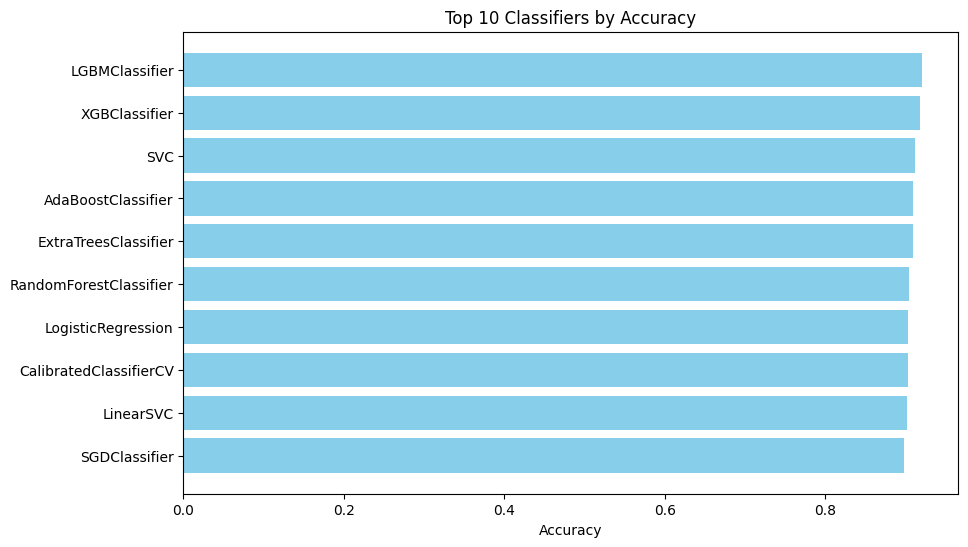

In [ ]:
# Display the results
print("Model Performance:")
print(models)

# Save the results to a CSV file for further analysis
models.to_csv('model_comparison_results.csv')

# Visualize the top-performing models
top_models = models.sort_values(by='Accuracy', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_models.index, top_models['Accuracy'], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Top 10 Classifiers by Accuracy')
plt.gca().invert_yaxis()
plt.show()

### Tuning the best model

In [36]:
lgbm = LGBMClassifier(random_state=42)

# Define the parameter grid for stochastic search
param_dist = {
    'num_leaves': np.arange(20, 150, 20),
    'max_depth': [None] + list(range(3, 15, 3)),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'n_estimators': [100, 200, 500, 1000],
    'subsample': np.linspace(0.5, 1.0, 5),
    'colsample_bytree': np.linspace(0.5, 1.0, 5),
    'min_child_samples': [10, 20, 30, 50],
    'reg_alpha': [0, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.01, 0.1, 1]
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=100,  # Number of random parameter combinations to try
    scoring='roc_auc',  # Optimize for AUC-ROC
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available processors
)

# Fit the model
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best model and parameters
best_model = random_search.best_estimator_
print("Best Parameters:")
print(random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 12176, number of negative: 12176
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3364
[LightGBM] [Info] Number of data points in the train set: 24352, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Parameters:
{'subsample': 0.9, 'reg_lambda': 0.01, 'reg_alpha': 0, 'num_leaves': np.int64(80), 'n_estimators': 300, 'min_child_samples': 20, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.9}


### Finding top 10 most important features and comparing the model built on it against base model

[LightGBM] [Info] Number of positive: 12176, number of negative: 12176
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3364
[LightGBM] [Info] Number of data points in the train set: 24352, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Length of feature_names: 34
Length of feature_importances: 34
Top 10 Most Important Features:
                  Feature  Importance
0             TotalAssets        2874
1              LoanAmount        2810
2            AnnualIncome        2735
3     MonthlyDebtPayments        2469
4        BaseInterestRate        2356
5   LengthOfCreditHistory        1902
6                     Age        1861
7        TotalLiabilities        1845
8             CreditScore        1825
9  CheckingAccountBalance        1774
[LightGBM] [Info] Number of positive: 12176, numb

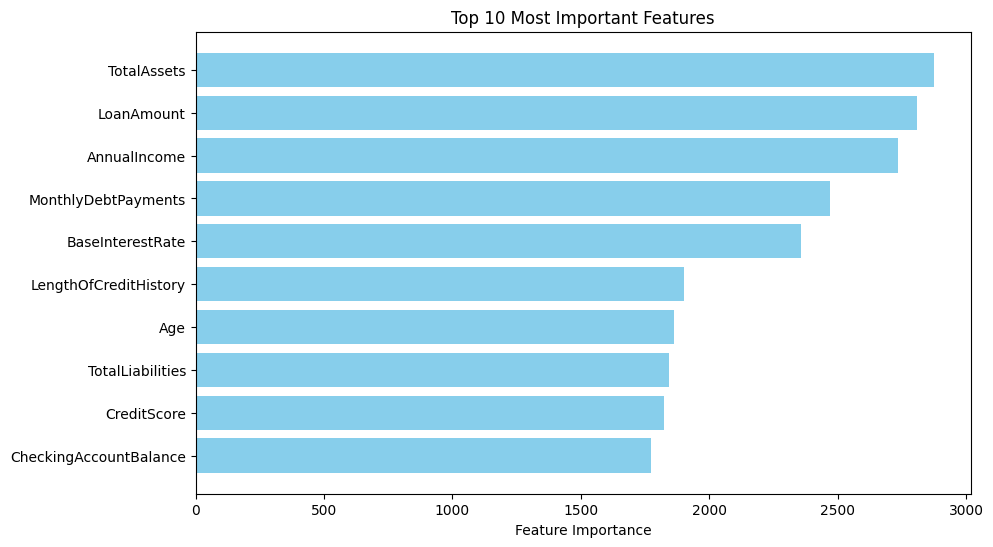

In [44]:
params = {
    'subsample': 1.0,
    'reg_lambda': 0.01,
    'reg_alpha': 0.01,
    'num_leaves': 80,
    'n_estimators': 500,
    'min_child_samples': 20,
    'max_depth': 13,
    'learning_rate': 0.042222222222222223,
    'colsample_bytree': 0.625
}

model = LGBMClassifier(**params, random_state=42, class_weight='balanced')
model.fit(X_train_resampled, y_train_resampled)

# Get feature importances
feature_importances = model.feature_importances_
feature_names = X_train.columns

print(f"Length of feature_names: {len(feature_names)}")
print(f"Length of feature_importances: {len(feature_importances)}")

# Combine feature names and importances into a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the top 10 features
top_10_features = importance_df.head(10)
print("Top 10 Most Important Features:")
print(top_10_features)

top_10_feature_names = top_10_features['Feature'].values
X_train_top10 = X_train_resampled[top_10_feature_names]
X_test_top10 = X_test[top_10_feature_names]

# Train a new LGBMClassifier with the same parameters
model_top10 = LGBMClassifier(**params, random_state=42 , class_weight='balanced')
model_top10.fit(X_train_top10, y_train_resampled)

# Plot the top 10 features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

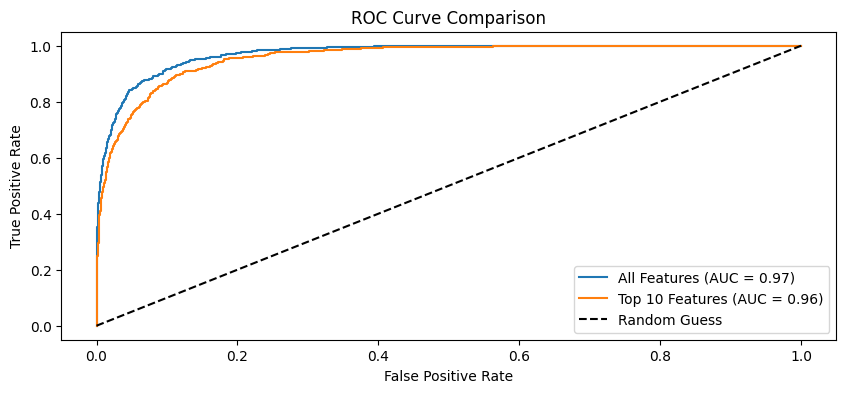

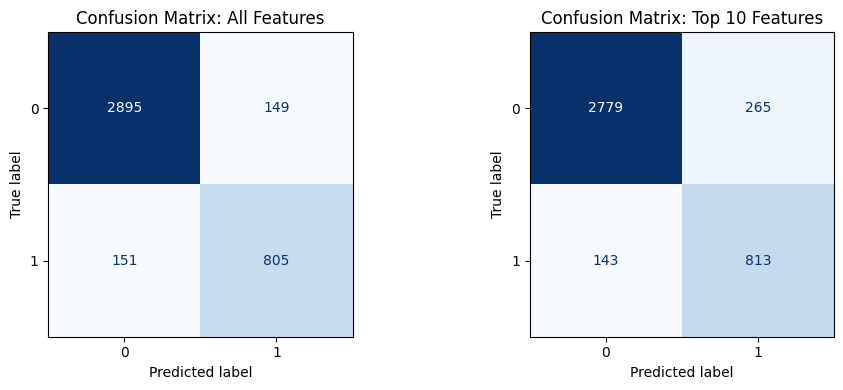

In [1]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have best_model and top_10_features from your earlier code

def plot_roc_curves(model_all, model_top10, X_test_all, X_test_top10, y_test):
    # Predictions for the model using all features
    y_prob_all = model_all.predict_proba(X_test_all)[:, 1]
    y_pred_all = model_all.predict(X_test_all)
    auc_all = roc_auc_score(y_test, y_prob_all)
    fpr_all, tpr_all, _ = roc_curve(y_test, y_prob_all)

    # Predictions for the model using top 10 features
    y_prob_top10 = model_top10.predict_proba(X_test_top10)[:, 1]
    y_pred_top10 = model_top10.predict(X_test_top10)
    auc_top10 = roc_auc_score(y_test, y_prob_top10)
    fpr_top10, tpr_top10, _ = roc_curve(y_test, y_prob_top10)

    # Plotting the ROC curves
    plt.figure(figsize=(10, 4))

    plt.plot(fpr_all, tpr_all, label=f'All Features (AUC = {auc_all:.2f})')
    plt.plot(fpr_top10, tpr_top10, label=f'Top 10 Features (AUC = {auc_top10:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend(loc='best')

    plt.show()

    # Plotting Confusion Matrices
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    # Confusion matrix for model using all features
    cm_all = confusion_matrix(y_test, y_pred_all)
    disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all)
    disp_all.plot(ax=axes[0], cmap='Blues', colorbar=False)
    axes[0].set_title('Confusion Matrix: All Features')

    # Confusion matrix for model using top 10 features
    cm_top10 = confusion_matrix(y_test, y_pred_top10)
    disp_top10 = ConfusionMatrixDisplay(confusion_matrix=cm_top10)
    disp_top10.plot(ax=axes[1], cmap='Blues', colorbar=False)
    axes[1].set_title('Confusion Matrix: Top 10 Features')

    plt.tight_layout()
    plt.show()


# Call function
plot_roc_curves(model, model_top10, X_test, X_test_top10, y_test)


In [44]:
final_train_df = data_encoded[top_10_feature_names]
final_train_df.to_csv('final_train_df.csv')

In [29]:
import pickle

# Save the trained LightGBM model
with open("lgbm_top10_model.pkl", "wb") as model_file:
    pickle.dump(model_top10, model_file)

### Random Forest Classifier

In [47]:
# Define the parameter grid for RandomizedSearchCV
param_dist_rf = {
    'n_estimators': [50, 100, 300],  # Moderate range of tree counts
    'max_depth': [10, 20, 30],  # Broader depth options
    'min_samples_split': [2, 5, 10],  # Core split values
    'min_samples_leaf': [1, 2, 4],  # Common leaf sizes
    'max_features': ['sqrt', 'log2'],  # Effective strategies
    'criterion': ['gini', 'entropy']  # Evaluate both splitting criteria
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV for hyperparameter tuning
random_search_rf = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist_rf,
    n_iter=20,  # Number of parameter combinations to try
    scoring='roc_auc',  # Optimize for AUC-ROC
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1  # Utilize all available processors
)

# Fit the model
random_search_rf.fit(X_train_resampled, y_train_resampled)

# Get the best model and parameters
best_rf_model = random_search_rf.best_estimator_
print("Best Parameters for Random Forest:")
print(random_search_rf.best_params_)

# Evaluate the best model on the test set
# Align X_test to ensure feature consistency
X_test_aligned = X_test[X_train_resampled.columns]

y_pred_rf = best_rf_model.predict(X_test_aligned)
y_prob_rf = best_rf_model.predict_proba(X_test_aligned)[:, 1]

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for Random Forest:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'gini'}



Classification Report: Tuned Random Forest
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3044
           1       0.80      0.80      0.80       956

    accuracy                           0.90      4000
   macro avg       0.87      0.87      0.87      4000
weighted avg       0.90      0.90      0.90      4000



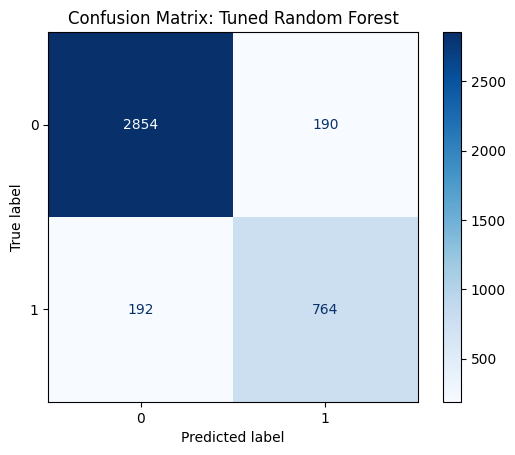

AUC-ROC: 0.96


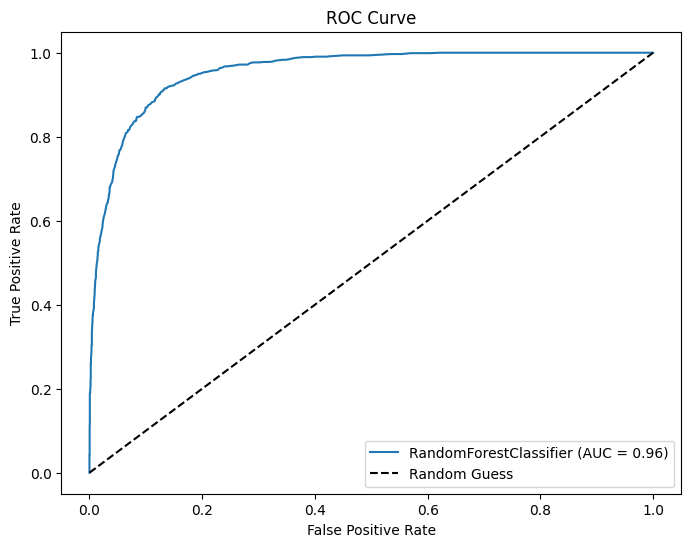

In [50]:
# Classification Report
print("\nClassification Report: Tuned Random Forest")
print(classification_report(y_test, y_pred_rf))

# Plot Confusion Matrix
cm_rf_tuned = confusion_matrix(y_test, y_pred_rf)
disp_rf_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_rf_tuned, display_labels=best_rf_model.classes_)
disp_rf_tuned.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix: Tuned Random Forest')
plt.show()

# Calculate AUC-ROC
auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"AUC-ROC: {auc_rf:.2f}")

# Plot the ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'RandomForestClassifier (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

## Regression for Risk Score Prediction

In [51]:
# Re-training regression models on the feature set after dropping highly correlated features
selected_features = X_reduced  # Using the reduced feature set from your preprocessing logic
Y_regression = data_encoded['RiskScore']
# Splitting the selected dataset
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    selected_features, Y_regression, test_size=0.25, random_state=42
)

In [54]:
# Models to be evaluated
models_final = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

# Dictionary to store evaluation results for the selected feature set
evaluation_results_final = {}

# Training and evaluating each model on the selected feature set
for model_name, model in models_final.items():
    model.fit(X_train_selected, y_train_selected)
    y_pred_final = model.predict(X_test_selected)

    # Calculating evaluation metrics
    mse_final = mean_squared_error(y_test_selected, y_pred_final)
    mae_final = mean_absolute_error(y_test_selected, y_pred_final)
    r2_final = r2_score(y_test_selected, y_pred_final)

    # Storing the results
    evaluation_results_final[model_name] = {
        "MSE": mse_final,
        "MAE": mae_final,
        "R^2": r2_final
    }

# Convert the dictionary to a DataFrame
evaluation_df_final = pd.DataFrame.from_dict(evaluation_results_final, orient="index")

# Displaying the final evaluation results using standard print method
print("Regression Model Evaluation Results with Selected Features:")
print(evaluation_df_final)

Regression Model Evaluation Results with Selected Features:
                              MSE  MAE  R^2
Linear Regression           14.97 3.18 0.76
Random Forest Regressor      9.67 2.05 0.84
Gradient Boosting Regressor  8.95 2.13 0.86


In [55]:
# Parameter grids for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

In [56]:
# Hyperparameter tuning for Random Forest Regressor
grid_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)
grid_rf.fit(X_train_selected, y_train_selected)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   scoring='neg_mean_squared_error')

In [57]:
# Hyperparameter tuning for Gradient Boosting Regressor
grid_gb = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)
grid_gb.fit(X_train_selected, y_train_selected)

RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200]},
                   scoring='neg_mean_squared_error')

In [65]:
# Best parameters and scores
best_rf_params = grid_rf.best_params_
best_rf_score = -grid_rf.best_score_  # Convert back to positive MSE

best_gb_params = grid_gb.best_params_
best_gb_score = -grid_gb.best_score_  # Convert back to positive MSE

print("Best Random Forest Parameters:", best_rf_params)
print("Best Random Forest MSE:", best_rf_score)

print("Best Gradient Boosting Parameters:", best_gb_params)
print("Best Gradient Boosting MSE:", best_gb_score)

Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}
Best Random Forest MSE: 10.338866507491025
Best Gradient Boosting Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 3, 'learning_rate': 0.1}
Best Gradient Boosting MSE: 8.054544710020364


In [66]:
# Evaluate on test data
best_rf = grid_rf.best_estimator_
best_gb = grid_gb.best_estimator_

rf_pred = best_rf.predict(X_test_selected)
gb_pred = best_gb.predict(X_test_selected)

rf_mse = mean_squared_error(y_test_selected, rf_pred)
rf_mae = mean_absolute_error(y_test_selected, rf_pred)
rf_r2 = r2_score(y_test_selected, rf_pred)

gb_mse = mean_squared_error(y_test_selected, gb_pred)
gb_mae = mean_absolute_error(y_test_selected, gb_pred)
gb_r2 = r2_score(y_test_selected, gb_pred)

print("\nRandom Forest Test Results:")
print(f"MSE: {rf_mse}, MAE: {rf_mae}, R^2: {rf_r2}")

print("\nGradient Boosting Test Results:")
print(f"MSE: {gb_mse}, MAE: {gb_mae}, R^2: {gb_r2}")


Random Forest Test Results:
MSE: 9.56476604446537, MAE: 2.029870483406873, R^2: 0.8450321318967184

Gradient Boosting Test Results:
MSE: 7.862941022646525, MAE: 1.9865806486993083, R^2: 0.8726050170347395


### Neural Network for Classification

In [68]:
# Function to create a Keras model
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=512, step=32),
                    activation=hp.Choice('activation_input', ['relu', 'tanh']),
                    input_dim=X_train.shape[1]))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=512, step=32),
                        activation=hp.Choice('activation_hidden', ['relu', 'tanh'])))
        model.add(Dropout(hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))  # Dropout for regularization
    model.add(Dense(units=1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


tuner = RandomSearch(
    build_model,
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=7,  # Number of hyperparameter combinations to try
    executions_per_trial=1,  # Number of model evaluations per trial
    directory='hyperparameter_tuning_nn',
    project_name='loan_approval_nn'
)

# Perform hyperparameter search
tuner.search(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters:")
print(f"Units (Input Layer): {best_hps.get('units_input')}")
print(f"Activation (Input Layer): {best_hps.get('activation_input')}")
print(f"Number of Hidden Layers: {best_hps.get('num_layers')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Trial 7 Complete [00h 00m 53s]
val_accuracy: 0.7593749761581421

Best val_accuracy So Far: 0.8481249809265137
Total elapsed time: 00h 06m 18s
Best Hyperparameters:
Units (Input Layer): 96
Activation (Input Layer): tanh
Number of Hidden Layers: 1
Learning Rate: 0.00038593719959256805
Epoch 1/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7308 - loss: 0.5807 - val_accuracy: 0.7594 - val_loss: 0.5379
Epoch 2/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7562 - loss: 0.5461 - val_accuracy: 0.7594 - val_loss: 0.5546
Epoch 3/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7609 - loss: 0.5397 - val_accuracy: 0.7594 - val_loss: 0.5405
Epoch 4/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7617 - loss: 0.5363 - val_accuracy: 0.7594 - val_loss: 0.5370
Epoch 5/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7638 - loss: 0.5351 - val_accuracy: 0.7594 - val_loss: 0.5398
Epoch 6/50
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7589 - los

In [69]:
# Evaluate the model on the test set
y_pred_nn = (best_model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

# Calculate and print AUC-ROC
y_prob_nn = best_model.predict(X_test).ravel()
auc = roc_auc_score(y_test, y_prob_nn)
print(f"AUC-ROC: {auc:.2f}")

125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3044
           1       0.85      0.68      0.76       956

    accuracy                           0.90      4000
   macro avg       0.88      0.82      0.85      4000
weighted avg       0.89      0.90      0.89      4000

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
AUC-ROC: 0.95


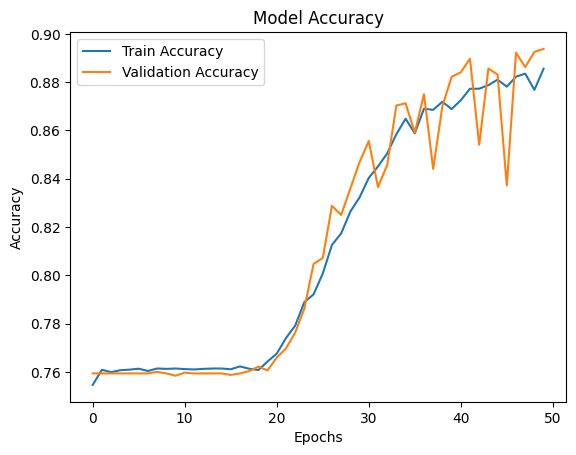

In [70]:
# Plot the learning curve
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

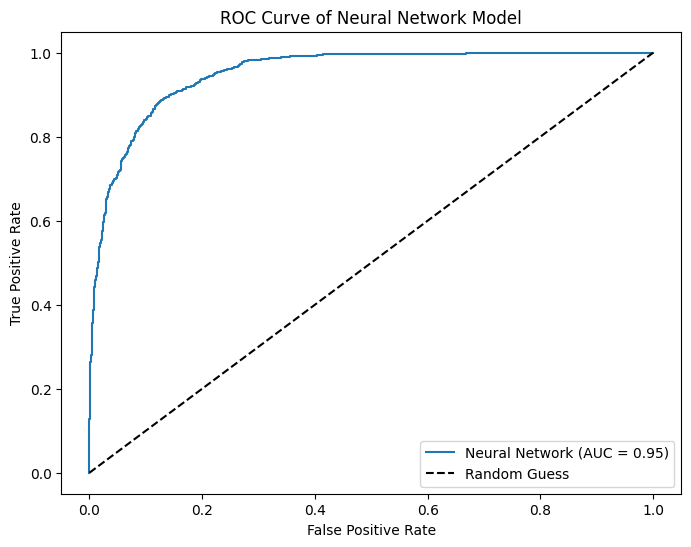

In [71]:
# Plot the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_nn)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Neural Network (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of Neural Network Model')
plt.legend(loc='best')
plt.show()

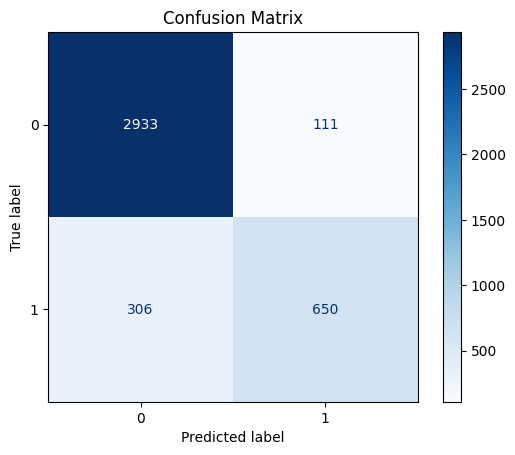

In [72]:
cm = confusion_matrix(y_test, y_pred_nn)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix')
plt.show()